#### 사용하지 않을 컬럼 삭제 - 최

## 박스오피스 관람객수에 따른 흥행등급 나누기

### 관객수 카테고리 설정

In [65]:
# 박스오피스 관람객수에 따른 흥행등급 나누기
def box_office(sum_audience):
    cat = 0
    if sum_audience < 1000000: cat = 0 
    elif sum_audience < 5000000 : cat = 1
    elif sum_audience < 7000000 : cat = 2
    elif sum_audience < 10000000 : cat = 3
    else : cat = 4
    return cat

def box_office2(sum_audience):
    cat = 0
    if sum_audience < 5000000: cat = 0 
    else : cat = 1
    return cat

# 100만, 100~500, 500~700, 700이상
def box_office3(sum_audience):
    cat = 0
    if sum_audience < 1000000: cat = 0 
    elif sum_audience < 5000000 : cat = 1
    elif sum_audience < 7000000 : cat = 2
    else : cat = 3
    return cat

# 50만, 100~200, 200~300, 300이상
def box_office4(sum_audience):
    cat = 0
    if sum_audience < 500000: cat = 0 
    elif sum_audience < 1000000 : cat = 1
    elif sum_audience < 2000000 : cat = 2
    elif sum_audience < 3000000 : cat = 3
    else : cat = 4
    return cat

# ~5만, 10만, 20만, 30만, 50만, 100만, 200만, 300만, 700만
def box_office5(sum_audience):
    cat = 0
    if sum_audience < 50000: cat = 0 
    elif sum_audience < 100000 : cat = 1
    elif sum_audience < 200000 : cat = 2
    elif sum_audience < 300000 : cat = 3
    elif sum_audience < 500000 : cat = 4
    elif sum_audience < 1000000 : cat = 5
    elif sum_audience < 2000000 : cat = 6
    elif sum_audience < 3000000 : cat = 7
    elif sum_audience < 7000000 : cat = 8
    else : cat = 9
    return cat

data['box_office'] = data['sum_audience'].apply(lambda x : box_office5(x))
data.sample(5)

,sum_audience,screens,shows,year,dir_pre_cnt,dir_pre_aud,dir_score,act_pre_aud,act_score,nv_code,...,nation_Japan,nation_China,nation_Czech,nation_Canada,nation_France,nation_Finland,nation_Korea,nation_Australia,nation_HongKong,box_office
658,69786,196,3146,2014,0,69786,0.07,69786,0.0,99792,...,0,0,0,0,0,0,0,0,0,1
336,220748,297,4347,2013,0,220748,0.22,220748,0.0,103343,...,0,0,0,0,0,0,0,0,0,3
1348,2718158,904,70451,2016,3,5491559,2.25,2718158,0.0,129383,...,0,0,0,0,0,0,0,0,0,7
321,500266,324,22299,2010,0,500266,0.50,500266,0.0,70999,...,0,0,0,0,0,0,0,0,0,5
683,2078825,585,45906,2014,0,2078825,1.27,2078825,0.0,100990,...,0,0,0,0,0,0,0,0,0,7


(array([132.,  96., 113.,  79., 115., 158., 145.,  92., 104.,  34.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

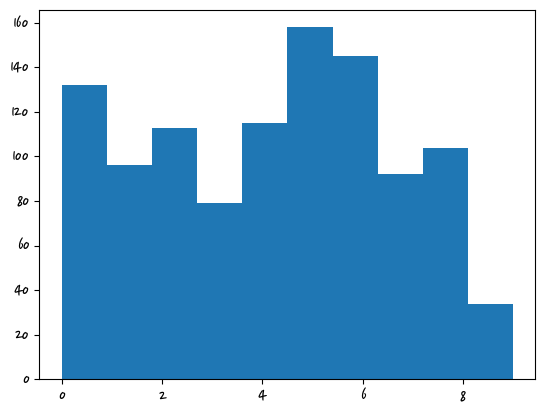

In [66]:
# 카테고리별 관객수 확인
plt.hist(data['box_office'])

### 디시전트리, 랜덤포레스트, 로지스틱회귀, knn, xgb

In [67]:
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [68]:
xgb_clf = XGBClassifier(n_estimators=1500, eval_metric='logloss')

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

In [69]:
data.columns

Index(['sum_audience', 'screens', 'shows', 'year', 'dir_pre_cnt',
       'dir_pre_aud', 'dir_score', 'act_pre_aud', 'act_score', 'nv_code',
       'ratings_aud', 'ratings_critics', 'ratings_netizen', 'rated_12',
       'rated_15', 'rated_all', 'rated_19', 'genre_fantasy', 'genre_family',
       'genre_horror', 'genre_etc', 'genre_documentary', 'genre_drama',
       'genre_romance', 'genre_mystery', 'genre_crime', 'genre_historical',
       'genre_thriller', 'genre_animation', 'genre_action', 'genre_adventure',
       'genre_war', 'genre_comedy', 'nation_SouthAfrica', 'nation_Denmark',
       'nation_Germany', 'nation_Russia', 'nation_Mexico', 'nation_US',
       'nation_Belgium', 'nation_Sweden', 'nation_Spain', 'nation_England',
       'nation_Italy', 'nation_India', 'nation_Indonesia', 'nation_Japan',
       'nation_China', 'nation_Czech', 'nation_Canada', 'nation_France',
       'nation_Finland', 'nation_Korea', 'nation_Australia', 'nation_HongKong',
       'box_office'],
      dtyp

다 넣은 거

In [70]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'year', 'nv_code', 'box_office']

In [71]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'year', 'nv_code', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0
RandomForestClassifier 정확도 : 0.963// 정밀도: 0.966// 재현율: 0.939// F1스코어 macro 0.945// F1스코어 micro: 0.963
LogisticRegression 정확도 : 0.117// 정밀도: 0.141// 재현율: 0.124// F1스코어 macro 0.053// F1스코어 micro: 0.117
KNeighborsClassifier 정확도 : 0.939// 정밀도: 0.945// 재현율: 0.939// F1스코어 macro 0.939// F1스코어 micro: 0.939
XGBClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0


In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        10

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



감독지수 뺀 거

In [73]:
# 포함 컬럼
# 스크린, 상영회수, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud', 'dir_score', 'nv_code', 'box_office']

In [74]:
# 포함 컬럼
# 스크린, 상영회수, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud', 'dir_score', 'nv_code', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0
RandomForestClassifier 정확도 : 0.888// 정밀도: 0.886// 재현율: 0.832// F1스코어 macro 0.841// F1스코어 micro: 0.888
LogisticRegression 정확도 : 0.201// 정밀도: 0.116// 재현율: 0.191// F1스코어 macro 0.123// F1스코어 micro: 0.201
KNeighborsClassifier 정확도 : 0.995// 정밀도: 0.994// 재현율: 0.995// F1스코어 macro 0.994// F1스코어 micro: 0.995
XGBClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0


In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00         6

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



배우지수 뺀 거

In [76]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'year', 'act_pre_aud', 'act_score', 'nv_code', 'box_office']

In [77]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'year', 'act_pre_aud', 'act_score', 'nv_code', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 0.846// 정밀도: 0.856// 재현율: 0.846// F1스코어 macro 0.848// F1스코어 micro: 0.846
RandomForestClassifier 정확도 : 0.804// 정밀도: 0.843// 재현율: 0.78// F1스코어 macro 0.794// F1스코어 micro: 0.804
LogisticRegression 정확도 : 0.159// 정밀도: 0.043// 재현율: 0.138// F1스코어 macro 0.062// F1스코어 micro: 0.159
KNeighborsClassifier 정확도 : 0.706// 정밀도: 0.729// 재현율: 0.699// F1스코어 macro 0.708// F1스코어 micro: 0.706
XGBClassifier 정확도 : 0.86// 정밀도: 0.863// 재현율: 0.86// F1스코어 macro 0.86// F1스코어 micro: 0.86


In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.94      0.83      0.88        18
           2       0.70      0.70      0.70        20
           3       0.82      0.88      0.85        16
           4       0.90      0.75      0.82        24
           5       0.81      0.89      0.85        28
           6       0.88      0.91      0.89        23
           7       0.87      0.87      0.87        23
           8       0.89      0.89      0.89        27
           9       0.92      0.92      0.92        12

    accuracy                           0.86       214
   macro avg       0.86      0.86      0.86       214
weighted avg       0.86      0.86      0.86       214



별점지수 뺀 거

In [79]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'year', 'nv_code', 'ratings_aud', 'ratings_critics', 'ratings_netizen', 'box_office']

In [80]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'year', 'nv_code', 'ratings_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0
RandomForestClassifier 정확도 : 0.958// 정밀도: 0.949// 재현율: 0.943// F1스코어 macro 0.944// F1스코어 micro: 0.958
LogisticRegression 정확도 : 0.15// 정밀도: 0.164// 재현율: 0.153// F1스코어 macro 0.099// F1스코어 micro: 0.15
KNeighborsClassifier 정확도 : 0.916// 정밀도: 0.919// 재현율: 0.925// F1스코어 macro 0.92// F1스코어 micro: 0.916
XGBClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0


In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00         6

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



상영 전 알 수 있는 정보 넣기

In [82]:
# 포함 컬럼
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'ratings_aud', 'ratings_critics', 'ratings_netizen', 'box_office']

In [83]:
# 포함 컬럼
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'ratings_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0
RandomForestClassifier 정확도 : 0.888// 정밀도: 0.883// 재현율: 0.882// F1스코어 macro 0.88// F1스코어 micro: 0.888
LogisticRegression 정확도 : 0.112// 정밀도: 0.145// 재현율: 0.115// F1스코어 macro 0.047// F1스코어 micro: 0.112
KNeighborsClassifier 정확도 : 0.874// 정밀도: 0.88// 재현율: 0.867// F1스코어 macro 0.872// F1스코어 micro: 0.874
XGBClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0


In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00         4

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



상영 전 알 수 있는 정보 2 (관객수랑 관련된거 최대한 빼기)

In [109]:
# 포함 컬럼
# 감독지수 dir_pre_cnt, dir_score, 
# 배우지수 act_score, 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'ratings_aud', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office']

In [86]:
# 포함 컬럼
# 감독지수 dir_pre_cnt, dir_score, 
# 배우지수 act_score, 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'ratings_aud', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 0.724// 정밀도: 0.723// 재현율: 0.699// F1스코어 macro 0.705// F1스코어 micro: 0.724
RandomForestClassifier 정확도 : 0.607// 정밀도: 0.586// 재현율: 0.565// F1스코어 macro 0.56// F1스코어 micro: 0.607
LogisticRegression 정확도 : 0.336// 정밀도: 0.308// 재현율: 0.301// F1스코어 macro 0.289// F1스코어 micro: 0.336
KNeighborsClassifier 정확도 : 0.425// 정밀도: 0.406// 재현율: 0.38// F1스코어 macro 0.378// F1스코어 micro: 0.425
XGBClassifier 정확도 : 0.743// 정밀도: 0.738// 재현율: 0.713// F1스코어 macro 0.719// F1스코어 micro: 0.743


In [87]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.84      0.73      0.78        22
           2       0.78      0.69      0.73        26
           3       0.64      0.82      0.72        17
           4       0.56      0.60      0.58        15
           5       0.71      0.81      0.76        37
           6       0.86      0.73      0.79        33
           7       0.75      0.60      0.67        15
           8       0.64      0.74      0.68        19
           9       0.75      0.50      0.60         6

    accuracy                           0.74       214
   macro avg       0.74      0.71      0.72       214
weighted avg       0.75      0.74      0.74       214



상영 전 알 수 있는 정보 3 (관객수랑 관련된거 완전 빼기)

In [115]:
# 포함 컬럼
# 감독지수 dir_pre_cnt,
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'dir_score', 'ratings_aud', 'act_score', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office']

In [116]:
# 포함 컬럼
# 감독지수 dir_pre_cnt,
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'dir_score', 'ratings_aud', 'act_score', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 0.192// 정밀도: 0.184// 재현율: 0.159// F1스코어 macro 0.157// F1스코어 micro: 0.192
RandomForestClassifier 정확도 : 0.178// 정밀도: 0.203// 재현율: 0.157// F1스코어 macro 0.161// F1스코어 micro: 0.178
LogisticRegression 정확도 : 0.178// 정밀도: 0.11// 재현율: 0.142// F1스코어 macro 0.122// F1스코어 micro: 0.178
KNeighborsClassifier 정확도 : 0.168// 정밀도: 0.198// 재현율: 0.163// F1스코어 macro 0.16// F1스코어 micro: 0.168
XGBClassifier 정확도 : 0.215// 정밀도: 0.241// 재현율: 0.181// F1스코어 macro 0.189// F1스코어 micro: 0.215


In [117]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.41      0.37      0.39        30
           1       0.50      0.19      0.28        26
           2       0.14      0.12      0.13        16
           3       0.00      0.00      0.00        13
           4       0.13      0.10      0.11        20
           5       0.27      0.35      0.30        37
           6       0.09      0.16      0.11        25
           7       0.18      0.12      0.15        16
           8       0.19      0.26      0.22        23
           9       0.50      0.12      0.20         8

    accuracy                           0.21       214
   macro avg       0.24      0.18      0.19       214
weighted avg       0.25      0.21      0.22       214



### XGB, 피처중요도

In [88]:
import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from xgboost import plot_importance

In [110]:
# 포함 컬럼
# 감독지수 dir_pre_cnt, dir_score, 
# 배우지수 act_score, 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'ratings_aud', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [111]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [112]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    # 'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 1500
eval_list = [(dtr, 'train'), (dval, 'eval')]

In [113]:
xgb_model = xgb.train(params, dtr, num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-logloss:-3.37803	eval-logloss:-3.59163
[1]	train-logloss:-65.49113	eval-logloss:-72.87479
[2]	train-logloss:-104.90243	eval-logloss:-114.18547
[3]	train-logloss:-108.63627	eval-logloss:-117.12828
[4]	train-logloss:-114.02284	eval-logloss:-119.59682
[5]	train-logloss:-114.08606	eval-logloss:-120.01681
[6]	train-logloss:-114.18153	eval-logloss:-120.10300
[7]	train-logloss:-114.31792	eval-logloss:-120.22639
[8]	train-logloss:-116.77911	eval-logloss:-122.47938
[9]	train-logloss:-116.78680	eval-logloss:-122.51182
[10]	train-logloss:-116.79060	eval-logloss:-122.53423
[11]	train-logloss:-116.79413	eval-logloss:-123.26402
[12]	train-logloss:-116.80615	eval-logloss:-123.23056
[13]	train-logloss:-116.81290	eval-logloss:-123.21294
[14]	train-logloss:-116.97964	eval-logloss:-122.48256
[15]	train-logloss:-116.97919	eval-logloss:-122.48267
[16]	train-logloss:-116.98135	eval-logloss:-122.48461
[17]	train-logloss:-116.98328	eval-logloss:-122.48684
[18]	train-logloss:-116.98261	eval-logloss:-

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

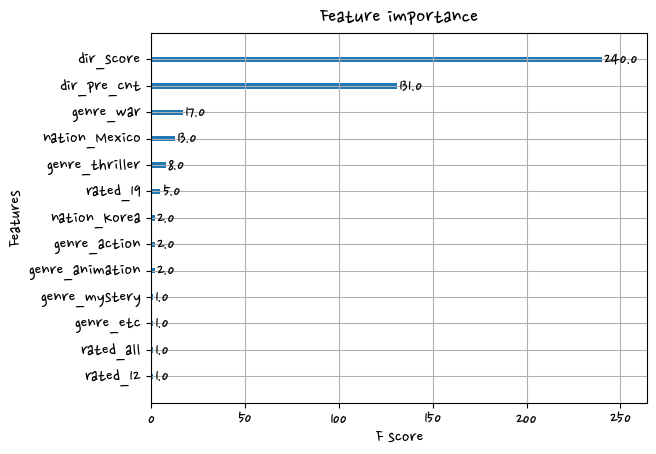

In [114]:
plot_importance(xgb_model)

In [118]:
# 포함 컬럼
# 감독지수 dir_pre_cnt,
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'dir_score', 'ratings_aud', 'act_score', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [119]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [120]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    # 'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 1500
eval_list = [(dtr, 'train'), (dval, 'eval')]

In [121]:
xgb_model = xgb.train(params, dtr, num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-logloss:-2.38067	eval-logloss:-2.15613
[1]	train-logloss:-12.88028	eval-logloss:-8.06350
[2]	train-logloss:-81.86505	eval-logloss:-76.13624
[3]	train-logloss:-112.69106	eval-logloss:-104.94892
[4]	train-logloss:-112.96858	eval-logloss:-106.58168
[5]	train-logloss:-116.72674	eval-logloss:-112.68343
[6]	train-logloss:-116.73483	eval-logloss:-113.47914
[7]	train-logloss:-116.99176	eval-logloss:-113.09441
[8]	train-logloss:-116.90415	eval-logloss:-113.09441
[9]	train-logloss:-116.90415	eval-logloss:-113.09441
[10]	train-logloss:-116.94253	eval-logloss:-113.09441
[11]	train-logloss:-116.94633	eval-logloss:-113.09441
[12]	train-logloss:-116.94407	eval-logloss:-113.09441
[13]	train-logloss:-116.94669	eval-logloss:-113.09441
[14]	train-logloss:-116.94608	eval-logloss:-113.09441
[15]	train-logloss:-116.94729	eval-logloss:-113.09441
[16]	train-logloss:-116.94714	eval-logloss:-113.09441
[17]	train-logloss:-116.94779	eval-logloss:-113.09441
[18]	train-logloss:-116.90415	eval-logloss:-113

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

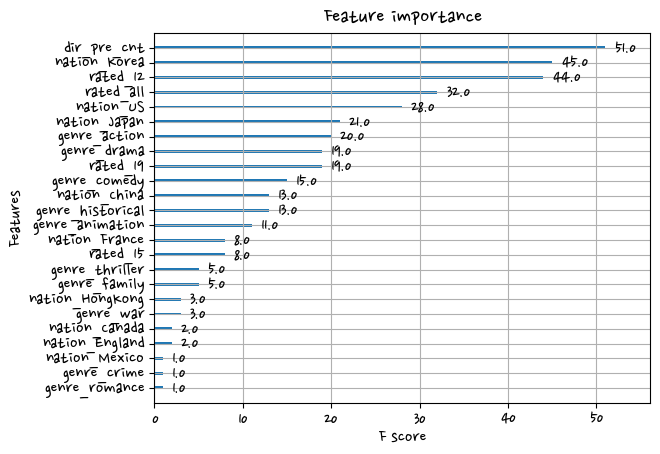

In [122]:
plot_importance(xgb_model)

In [123]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'year', 'nv_code', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [124]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [125]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    # 'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 1500
eval_list = [(dtr, 'train'), (dval, 'eval')]

In [126]:
xgb_model = xgb.train(params, dtr, num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-logloss:-3.86653	eval-logloss:-3.71796
[1]	train-logloss:-78.16198	eval-logloss:-75.05949
[2]	train-logloss:-109.18011	eval-logloss:-106.53051
[3]	train-logloss:-109.45081	eval-logloss:-106.86942
[4]	train-logloss:-114.69785	eval-logloss:-113.61082
[5]	train-logloss:-114.76648	eval-logloss:-113.68909
[6]	train-logloss:-114.86440	eval-logloss:-113.80177
[7]	train-logloss:-115.60395	eval-logloss:-114.66492
[8]	train-logloss:-118.59372	eval-logloss:-118.15972
[9]	train-logloss:-118.59881	eval-logloss:-118.16419
[10]	train-logloss:-118.60354	eval-logloss:-118.16836
[11]	train-logloss:-118.60794	eval-logloss:-118.17224
[12]	train-logloss:-118.61206	eval-logloss:-118.17586
[13]	train-logloss:-118.61585	eval-logloss:-118.17924
[14]	train-logloss:-118.61948	eval-logloss:-118.18240
[15]	train-logloss:-118.62278	eval-logloss:-118.18536
[16]	train-logloss:-118.62592	eval-logloss:-118.18813
[17]	train-logloss:-118.62890	eval-logloss:-118.19073
[18]	train-logloss:-118.63168	eval-logloss:-

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

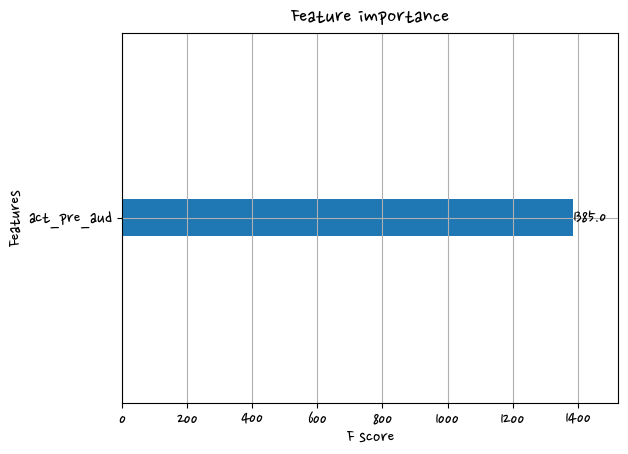

In [127]:
plot_importance(xgb_model)